In [50]:
import os, shutil, pathlib
from PIL import Image

In [52]:
def make_subset(subset, cat, dog, num_images):
    
    os.makedirs(f'cats_vs_dogs/{subset}/Cat')
    i, count = 0, 0
    while count < num_images:
        if os.path.exists(f'Cat/{cat + i}.jpg'):
            shutil.copyfile(src=f'Cat/{cat + i}.jpg', dst=f'cats_vs_dogs/{subset}/Cat/{cat + i}.jpg')
            count += 1
        i += 1
    cat += i    
    os.makedirs(f'cats_vs_dogs/{subset}/Dog')
    i, count = 0, 0
    while count < num_images:
        if os.path.exists(f'Dog/{dog + i}.jpg'):
            shutil.copyfile(src=f'Dog/{dog + i}.jpg', dst=f'cats_vs_dogs/{subset}/Dog/{dog + i}.jpg')
            count += 1
        i += 1
    dog += i        
    return cat, dog

In [54]:
cat, dog = make_subset("train", cat=0, dog=0, num_images=1000)
cat, dog = make_subset('val', cat=cat + 1, dog=dog + 1, num_images=500)
make_subset('test', cat=cat + 1, dog=dog + 1, num_images=500)

(2004, 2006)

In [56]:
# the files in our folders have .pngs and .gifs sprinkled in disguised as .jpgs so we need to fix them individually
import os
import PIL

def uncorrupt(path_images):
    filenames_src = os.listdir(path_images)
    for filename_src in filenames_src:
        stem, extension = os.path.splitext(filename_src)
        if (extension.lower() != '.jpg'): 
            continue

        pathname_jpg = os.path.join(path_images, filename_src)
        with open(pathname_jpg, 'rb') as fid:
            encoded_jpg = fid.read(4)
        
        # png
        if(encoded_jpg[0] == 0x89 and encoded_jpg[1] == 0x50 and encoded_jpg[2] == 0x4e and encoded_jpg[3] == 0x47):
            print('png:{}'.format(filename_src))
            pathname_png = os.path.join(path_images, f"{stem}.png")
            os.rename(pathname_jpg, pathname_png)
            PIL.Image.open(pathname_png).convert('RGB').save(pathname_jpg, "jpeg")   

        # gif
        elif(encoded_jpg[0] == 0x47 and encoded_jpg[1] == 0x49 and encoded_jpg[2] == 0x46):
            print('gif:{}'.format(filename_src))
            pathname_gif = os.path.join(path_images, f"{stem}.gif")
            os.rename(pathname_jpg, pathname_gif)
            PIL.Image.open(pathname_gif).convert('RGB').save(pathname_jpg, "jpeg")   

        # specific jpeg cases
        elif(filename_src == 'beagle_116.jpg' or filename_src == 'chihuahua_121.jpg'):
            print('jpeg:{}'.format(filename_src))
            pathname_jpeg = os.path.join(path_images, f"{stem}.jpeg")
            os.rename(pathname_jpg, pathname_jpeg)
            PIL.Image.open(pathname_jpeg).convert('RGB').save(pathname_jpg, "jpeg")   

        # not a jpg
        elif(encoded_jpg[0] != 0xff or encoded_jpg[1] != 0xd8 or encoded_jpg[2] != 0xff):
            print('not jpg:{}'.format(filename_src))

def clean_jpg(path_images):
    filenames_src = os.listdir(path_images)
    for filename_src in filenames_src:
        stem, extension = os.path.splitext(filename_src)
        if extension.lower() != '.jpg':
            continue
        
        pathname_jpg = os.path.join(path_images, filename_src)
        
        try:
            with Image.open(pathname_jpg) as img:
                img = img.convert('RGB')  # Ensure it's in RGB format
                img.save(pathname_jpg, format='JPEG', quality=95)  # Re-save as clean JPEG
                #print(f"Cleaned: {filename_src}")
        except Exception as e:
            print(f"Error cleaning {filename_src}: {e}")


for subset in ('train', 'val', 'test'):
    for category in ('Cat', 'Dog'):
        uncorrupt(f'cats_vs_dogs/{subset}/{category}')
        clean_jpg(f'cats_vs_dogs/{subset}/{category}')

gif:936.jpg
gif:660.jpg
gif:850.jpg
not jpg:445.jpg
not jpg:23.jpg
not jpg:910.jpg
gif:140.jpg
not jpg:391.jpg
not jpg:573.jpg
not jpg:565.jpg
not jpg:414.jpg
not jpg:561.jpg
not jpg:663.jpg
not jpg:296.jpg
not jpg:719.jpg
not jpg:522.jpg
not jpg:50.jpg
not jpg:543.jpg
not jpg:1151.jpg
not jpg:1386.jpg
not jpg:1267.jpg
not jpg:1356.jpg
not jpg:1168.jpg
gif:1308.jpg
not jpg:1017.jpg
not jpg:1757.jpg
not jpg:1914.jpg
not jpg:1937.jpg
not jpg:1936.jpg
gif:1866.jpg
not jpg:1900.jpg
not jpg:1884.jpg


In [58]:
import cv2
from PIL import Image

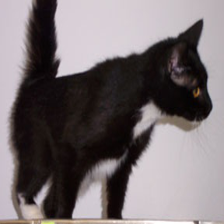

In [60]:
image = Image.open('cats_vs_dogs/test/Cat/1560.jpg')
image.resize((224, 224))

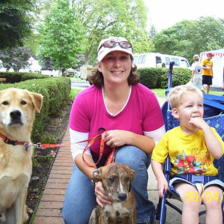

In [62]:
image = Image.open('cats_vs_dogs/test/Dog/1560.jpg')
image.resize((224, 224))

In [64]:
for subset in ('train', 'val', 'test'):
    for category in ('Cat', 'Dog'):
        folder = "cats_vs_dogs/" + subset + '/' + category
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            try:
                img = Image.open(file_path)
                img.verify()
            except (IOError, SyntaxError):
                print(f"Removing corrupt image: {file_path}")
                os.remove(file_path)

In [66]:
from tensorflow import keras
from tensorflow.keras import layers

In [68]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x) 
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Check if class folders have images
print("Cat images:", len(os.listdir('cats_vs_dogs/train/Cat')))
print("Dog images:", len(os.listdir('cats_vs_dogs/train/Dog')))

In [71]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    'cats_vs_dogs/train',
    image_size=(180, 180),
    batch_size=64)
validation_dataset = image_dataset_from_directory(
    'cats_vs_dogs/val',
    image_size=(180, 180),
    batch_size=64)
test_dataset = image_dataset_from_directory(
    'cats_vs_dogs/test',
    image_size=(180, 180),
    batch_size=64)

Found 2004 files belonging to 2 classes.
Found 1002 files belonging to 2 classes.
Found 1001 files belonging to 2 classes.


In [73]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

In [77]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 525ms/step - accuracy: 0.7206 - loss: 0.5601 - val_accuracy: 0.7016 - val_loss: 0.5624
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 520ms/step - accuracy: 0.7438 - loss: 0.5142 - val_accuracy: 0.7116 - val_loss: 0.5432
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 525ms/step - accuracy: 0.7501 - loss: 0.4939 - val_accuracy: 0.7226 - val_loss: 0.5538
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 528ms/step - accuracy: 0.7833 - loss: 0.4725 - val_accuracy: 0.7515 - val_loss: 0.5256
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 528ms/step - accuracy: 0.8278 - loss: 0.3943 - val_accuracy: 0.7365 - val_loss: 0.5553
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 521ms/step - accuracy: 0.8337 - loss: 0.3725 - val_accuracy: 0.6976 - val_loss: 0.6831
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 526ms/step - accuracy: 0.8534 - loss: 0.3392 - val_accuracy: 0.7335 - val_loss: 0.6101
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 545ms/step - accuracy: 0.8787 - loss: 0.2758 - val_accu

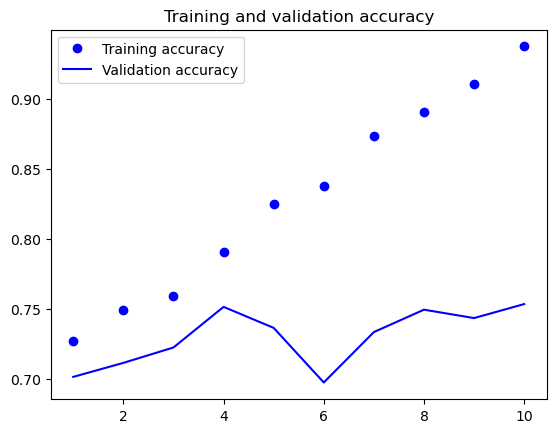

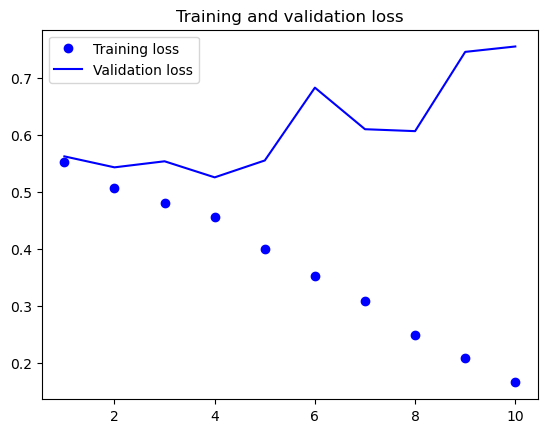

In [79]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [83]:
test_model = keras.models.load_model("convnet_from_scratch.keras") 
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {100 * test_acc:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.7247 - loss: 0.8743
Test accuracy: 73.03%
